In [2]:
import sympy
import numpy as np
from sympy import Eq, plot_implicit, Matrix, plot, symbols
from sympy.core import sympify
from sympy.geometry.point import Point, Point2D, Point3D
from sympy.geometry.line import Line
from sympy.core.symbol import _symbol
from sympy import pi as Pi
from sympy import cos as Cos
from sympy import sin as Sin
from sympy.geometry.entity import GeometryEntity, GeometrySet
import matplotlib.pyplot as plt

# Занятие 16
# Алгебра
## Кривые второго порядка на плоскости: парабола

### Задание 1
Определить класс parabola по образцу класса ellipse.

Реализовать атрибуты: 

параметр $p$,

вершина (vertex) в виде точки Point

фокус (focus) в виде точки Point

угол angle по умолчанию 0 для параболы с осью, параллельной OX, 
а для параболы с осью, параллельной  OY angle = $\pi/2$

ось симметрии (axis_symmetry) в виде прямой Line

директриса (directrix) в виде прямой Line

Реализовать методы 

equation(self) - уравнение параболы,

dir_equation(self) - уравнение директрисы,

ax_sym_equation(self) - уравнение оси симметрии,

rotate(self, angle) - поворот на угол angle против часовой стрелки, метод не изменяет параболу, а возвращает параболу с теми же p и вершиной, но угол увеличен на angle по сравнению с исходной параболой. 

В конструкторе экземпляра класса  

__new__(cls, p, vertex=None, angle=None)

p - обязательный параметр, а вид параболы по умолчанию  - парабола с осью, параллельной оси OX,
вершина по умолчанию в начале координат.

In [17]:
class Parabola(GeometrySet):
    def __new__(cls, p, vertex=None, angle=None):
        if vertex is None:
            vertex = Point(0, 0)
        else:
            vertex = Point(vertex, dim=2)
            
        if angle is None:
            angle = 0
        else:
            angle = angle
        
        return GeometryEntity.__new__(cls, p, vertex, angle)
    
    '''
    + параметр p
    + вершина (vertex) в виде точки Point
    + фокус (focus) в виде точки Point
    + угол angle по умолчанию 0 для параболы с осью, параллельной OX, а для параболы с осью, параллельной  OY angle = $\pi/2$
    + ось симметрии (axis_symmetry) в виде прямой Line
    + директриса (directrix) в виде прямой Line
    '''
    @property
    def p(self):
        return self.args[0]
    
    @property
    def vertex(self):
        return self.args[1]
    
    @property
    def angle(self):
        return self.args[2]
    
    @property
    def focus(self):
        if self.angle == 0:
            return Point(0, self.p/2)
        return Point(self.p/2, 0)
    
    @property
    def axis_symmetry(self):
        return Line(self.vertex, self.focus)
    
    @property
    def directrix(self):
        if self.angle == 0:
            p1 = Point(0, -self.p/2)
            p2 = Point(1, -self.p/2)
        else:
            p1 = Point(-self.p/2, 0)
            p2 = Point(-self.p/2, 1)
        return Line(p1, p2)
    
    '''
    + equation(self) - уравнение параболы
    + dir_equation(self) - уравнение директрисы,
    + ax_sym_equation(self) - уравнение оси симметрии,
    + rotate(self, angle) - поворот на угол angle против часовой стрелки, метод не изменяет параболу, 
    + а возвращает параболу с теми же p и вершиной, но угол увеличен на angle по сравнению с исходной параболой. 
    '''
    
    def equation(self):
        x = _symbol("x", real=True)
        y = _symbol("y", real=True)
        return Eq(y**2, 2*self.p*x)
    
    def dir_equation(self):
        return Eq(self.directrix.equation(), 0)
    
    def ax_sym_equation(self):
        return Eq(self.axis_symmetry.equation(), 0)
    
    def rotate(self, angle):
        return Parabola(self.p, self.vertex, self.angle + angle)

### Задание 2
Построить параболу с $p = 3$, вершиной в (-5, 2), осью симметрии, образующей угол $\pi/4$ с положительным направлением оси ОХ. Вывести на экран ее параметр p, вершину, угол, фокус, ось симметрии и директрису, а также уравнение параболы, оси симметрии и директрисы. 

'p'

3

'vertex'

Point2D(-5, 2)

'angle'

pi/4

'focus'

Point2D(3/2, 0)

'axis_symmetry'

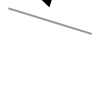

'directrix'

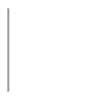

'equation'

Eq(y**2, 6*x)

'dir_equation'

Eq(x + 3/2, 0)

'ax_sym_equation'

Eq(2*x + 13*y/2 - 3, 0)

In [18]:
parabola = Parabola(3, Point(-5, 2), Pi/4)
props = {'p': parabola.p, 'vertex': parabola.vertex, 'angle': parabola.angle,
         'focus': parabola.focus, 'axis_symmetry': parabola.axis_symmetry, 'directrix': parabola.directrix,
         'equation': parabola.equation(), 'dir_equation': parabola.dir_equation(), 'ax_sym_equation': parabola.ax_sym_equation()}
for key in props:
    display(key, props[key])
    print()

### Индивидуальное задание
Построить параболу, построить другую параболу путем поворота исходной параболы на $\alpha$.

Использовать уравнения повернутой параболы, ее оси симметрии и директрисы для построения графиков в одной координатной плоскости. 

Цвета параболы, оси симметрии, директрисы индивидуальные, название графика Парабола, подписи осей $x$ и $y$.

Text(0, 0.5, 'y')

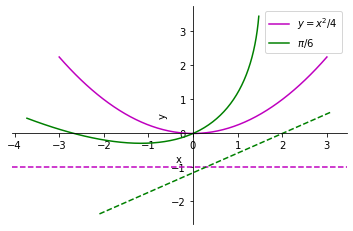

In [19]:
#  В ЛМС НЕТ 16-ОГО ИДЗ. ТУТ РЕШЕНИЕ В ОБЩЕМ ВИДЕ.

from sympy.abc import x, y
def parabola_y(p, x):
    return x**2/(2*p)

# Ввод перменных
p0 = 2
alpha = np.pi/6
A = Matrix([[np.cos(alpha), - np.sin(alpha)], [np.sin(alpha), np.cos(alpha)]])

# Создание графика
ax = plt.gca()
X = np.linspace(-3, 3)
Y = parabola_y(p0, X)
XY = Matrix((X, Y))
XY_new = A*XY

# Создание директрис
directrix = Matrix(([-3, 3], [-p0/2, -p0/2]))
directrix_new = A*directrix
X1 = list(XY_new[0, :])
Y1 = list(XY_new[1, :])
directrixX1 = list(directrix_new[0, :])
directrixY1 = list(directrix_new[1, :])

# Рисование графиков
ax.plot(X, Y, color='m', label=sympy.latex(Eq(y, parabola_y(p0, x)), mode='inline'))
ax.plot(X1, Y1, color='g', label=sympy.latex(sympy.pi/6, mode='inline'))
ax.axhline(y=-p0/2, color='m', linestyle='--')
ax.plot(directrixX1, directrixY1, color='g', linestyle='--')

# Подписи
ax.spines['right'].set_color('none') # Правая сторона рамки стала бесцветной, но не исчезла!
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position(('data', 0)) # Нижняя сторона рамки переместилась в начало координат
ax.spines['left'].set_position(('data', 0))
ax.legend(loc='best')
ax.set_xlabel('x')
ax.set_ylabel('y')